# Car Recommender System

For this project I have Used KMeans Clustering 

The Data used here contains information about cars such as model,manufacturer,price,mileage ,etc.  

The Goal Achieved here is when user enters a car model name,
the algo will return all the cars name with same price range

Imported required libraries and Data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
A=pd.read_csv('C:/Users/cmscomputers/Downloads/Skype/Datasets/Cars93.csv')
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [23]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [3]:
C=pd.DataFrame(A[['MPG.city','Price']])

In [5]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Z=pd.DataFrame(ss.fit_transform(C),columns=C.columns)

In [6]:
Z

,MPG.city,Price
0,0.471312,-0.375720
1,-0.781032,1.497844
2,-0.423219,0.998227
3,-0.602126,1.893374
4,-0.065407,1.091905
...,...,...
88,-0.959938,0.019810
89,-0.244313,0.051036
90,-0.781032,0.394523
91,-0.244313,0.332071


In [7]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
model = km.fit(Z)
model.labels_


array([2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 1])

Text(0.5, 1.0, 'Price vs Mileage')

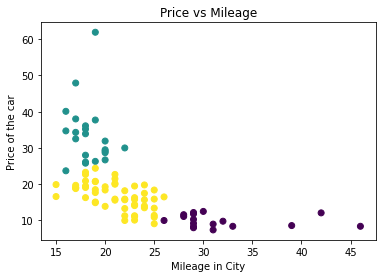

In [8]:
import matplotlib.pyplot as plt
plt.scatter(A['MPG.city'],A.Price,c=model.labels_)
plt.xlabel("Mileage in City")
plt.ylabel("Price of the car")
plt.title("Price vs Mileage")

In [9]:
model.cluster_centers_

array([[ 1.68156148, -0.99779245],
       [-0.72410737,  1.46141368],
       [-0.23437376, -0.28127091]])

In [10]:
centers=ss.inverse_transform(model.cluster_centers_)
a=pd.DataFrame(centers,columns=['x','y'])

In [11]:
a

,x,y
0,31.764706,9.923529
1,18.318182,33.550000
2,21.055556,16.807407


Text(0.5, 1.0, 'Price vs Mileage')

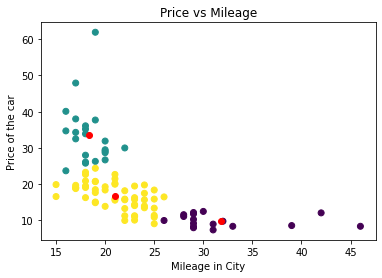

In [12]:
plt.scatter(A['MPG.city'],A.Price,c=model.labels_)
plt.scatter(a.x,a.y,c='red')
plt.xlabel("Mileage in City")
plt.ylabel("Price of the car")
plt.title("Price vs Mileage")

In [13]:
model.inertia_

55.245192883868334

In [14]:
K=[]
WCSS=[]
for i in range(1,20,1):
    km=KMeans(n_clusters=i)
    model=km.fit(Z)
    K.append(i)
    WCSS.append(model.inertia_)

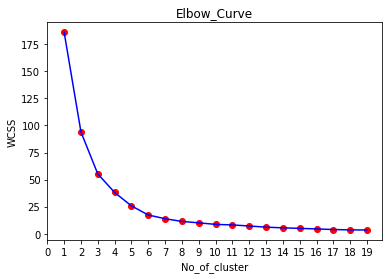

In [15]:
plt.scatter(K,WCSS,c='red')
plt.plot(K,WCSS,c='blue')
plt.xlabel('No_of_cluster')
plt.ylabel('WCSS')
plt.title('Elbow_Curve')
plt.xticks(range(0,20,1))
plt.show()

In [16]:
km = KMeans(n_clusters=4)
model = km.fit(C)
C["Clusters"]=model.labels_

In [17]:
C['Make']=A['Make']

In [18]:
C

,MPG.city,Price,Clusters,Make
0,25,15.9,0,Acura Integra
1,18,33.9,1,Acura Legend
2,20,29.1,1,Audi 90
3,19,37.7,1,Audi 100
4,22,30.0,1,BMW 535i
...,...,...,...,...
88,17,19.7,0,Volkswagen Eurovan
89,21,20.0,0,Volkswagen Passat
90,18,23.3,0,Volkswagen Corrado
91,21,22.7,0,Volvo 240


In [27]:
CarName=input('Enter your car of choice: ')
cluster_no=list(C[C.Make==CarName].Clusters)[0]
simcar=list(C[C.Clusters == cluster_no].Make)
simcar.remove(CarName)

print('Entered Car: ',CarName)
print('Similar Car: ',simcar)

Enter your car of choice: Acura Integra
Entered Car:  Acura Integra
Similar Car:  ['Buick Century', 'Buick LeSabre', 'Buick Roadmaster', 'Chevrolet Camaro', 'Chevrolet Lumina', 'Chevrolet Lumina_APV', 'Chevrolet Astro', 'Chevrolet Caprice', 'Chrylser Concorde', 'Chrysler LeBaron', 'Dodge Spirit', 'Dodge Caravan', 'Dodge Dynasty', 'Eagle Vision', 'Ford Tempo', 'Ford Mustang', 'Ford Probe', 'Ford Aerostar', 'Ford Taurus', 'Ford Crown_Victoria', 'Honda Prelude', 'Honda Accord', 'Hyundai Sonata', 'Mazda 626', 'Mazda MPV', 'Mercury Capri', 'Mercury Cougar', 'Nissan Altima', 'Nissan Quest', 'Nissan Maxima', 'Oldsmobile Achieva', 'Oldsmobile Cutlass_Ciera', 'Oldsmobile Silhouette', 'Oldsmobile Eighty-Eight', 'Plymouth Laser', 'Pontiac Firebird', 'Pontiac Grand_Prix', 'Pontiac Bonneville', 'Subaru Legacy', 'Toyota Celica', 'Toyota Camry', 'Toyota Previa', 'Volkswagen Eurovan', 'Volkswagen Passat', 'Volkswagen Corrado', 'Volvo 240']
